# Logistic Regression

**Classification for 10 Years risk of Coronary heart disease**

## Data Preparation

In [235]:
import numpy as np
import pandas as pd

df = pd.read_csv("framingham_heart_disease.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [236]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [237]:
series = pd.isnull(df['cigsPerDay'])
df[series]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
131,1,43,4.0,1,NaN,0.0,0,0,0,222.0,109.5,69.0,25.50,75.0,NaN,0
139,1,49,4.0,1,NaN,0.0,0,0,0,256.0,127.5,81.5,28.21,93.0,85.0,1
1046,0,49,1.0,1,NaN,0.0,0,0,0,280.0,120.0,80.0,22.33,90.0,75.0,0
1292,1,42,3.0,1,NaN,0.0,0,0,0,225.0,122.5,80.0,25.54,90.0,90.0,0
1347,0,58,4.0,1,NaN,0.0,0,1,0,270.0,195.0,117.5,23.35,75.0,NaN,0
1451,1,54,1.0,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1497,1,55,1.0,1,NaN,0.0,0,0,0,214.0,132.5,85.5,29.25,70.0,103.0,0
1610,0,61,1.0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
1625,0,49,2.0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0
1870,0,47,2.0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0


In [238]:
data = df.drop(['currentSmoker','education'], axis = 'columns')
data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Fill NaN for cigarettes per Day

In [239]:
cigs = data['cigsPerDay']
cigs.head()

0     0.0
1     0.0
2    20.0
3    30.0
4    23.0
Name: cigsPerDay, dtype: float64

In [240]:
cig = cigs.mean()

In [241]:
import math
integer_value = math.floor(cig)

cigs.fillna(integer_value, inplace = True)
data.isnull().sum()

male                 0
age                  0
cigsPerDay           0
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [242]:
data.dropna( axis = 0, inplace = True)
data.isnull().sum()

male               0
age                0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Data Exploration

In [243]:
df.mean()

male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [244]:
df.var()

male                  0.245047
age                  73.481926
education             1.039973
currentSmoker         0.250024
cigsPerDay          142.088631
BPMeds                0.028759
prevalentStroke       0.005866
prevalentHyp          0.214149
diabetes              0.025064
totChol            1988.297915
sysBP               485.677704
diaBP               141.868338
BMI                  16.647306
heartRate           144.639020
glucose             574.081513
TenYearCHD            0.128898
dtype: float64

In [245]:
df.skew()

male                0.286135
age                 0.228146
education           0.690033
currentSmoker       0.023606
cigsPerDay          1.247910
BPMeds              5.550010
prevalentStroke    12.909062
prevalentHyp        0.819278
diabetes            5.994378
totChol             0.871422
sysBP               1.145362
diaBP               0.714102
BMI                 0.981974
heartRate           0.644482
glucose             6.213402
TenYearCHD          1.939741
dtype: float64

In [246]:
df.kurtosis()

male                -1.919033
age                 -0.989636
education           -0.712394
currentSmoker       -2.000387
cigsPerDay           1.023356
BPMeds              28.816384
prevalentStroke    164.721624
prevalentHyp        -1.329411
diabetes            33.948587
totChol              4.131582
sysBP                2.155019
diaBP                1.277100
BMI                  2.656839
heartRate            0.907483
glucose             58.674278
TenYearCHD           1.763428
dtype: float64

In [247]:
df.min()

male                 0.00
age                 32.00
education            1.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            107.00
sysBP               83.50
diaBP               48.00
BMI                 15.54
heartRate           44.00
glucose             40.00
TenYearCHD           0.00
dtype: float64

In [248]:
df.max()

male                 1.0
age                 70.0
education            4.0
currentSmoker        1.0
cigsPerDay          70.0
BPMeds               1.0
prevalentStroke      1.0
prevalentHyp         1.0
diabetes             1.0
totChol            696.0
sysBP              295.0
diaBP              142.5
BMI                 56.8
heartRate          143.0
glucose            394.0
TenYearCHD           1.0
dtype: float64

In [249]:
df.median()

male                 0.0
age                 49.0
education            2.0
currentSmoker        0.0
cigsPerDay           0.0
BPMeds               0.0
prevalentStroke      0.0
prevalentHyp         0.0
diabetes             0.0
totChol            234.0
sysBP              128.0
diaBP               82.0
BMI                 25.4
heartRate           75.0
glucose             78.0
TenYearCHD           0.0
dtype: float64

In [250]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [251]:
import seaborn as sns

<AxesSubplot:>

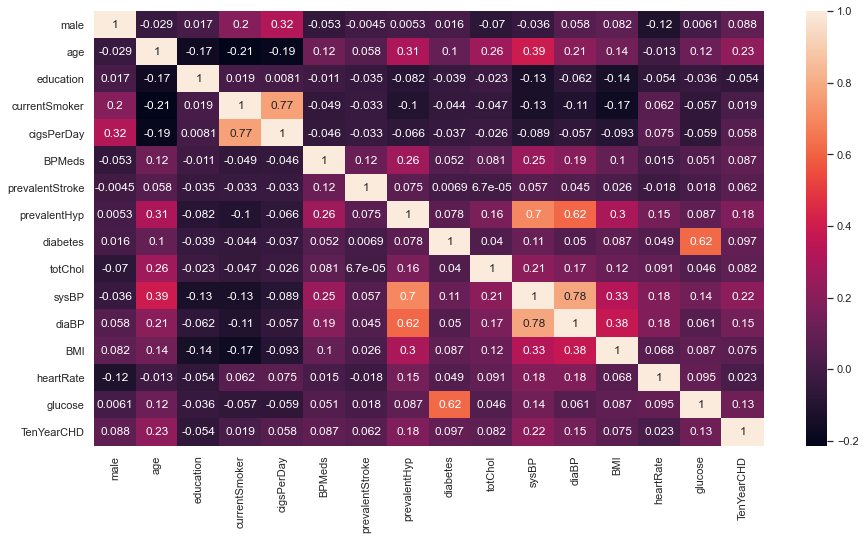

In [252]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(df.corr(), annot=True,  annot_kws={'size':12 })

## Plots

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='glucose'>

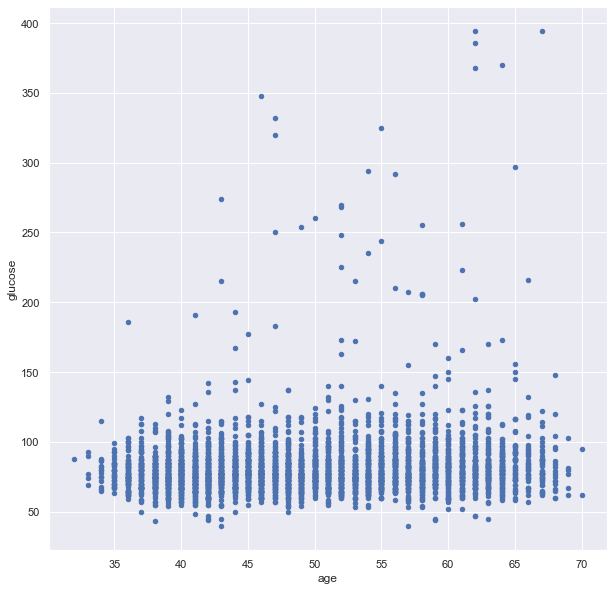

In [253]:
df.plot.scatter('age', 'glucose',figsize=(10, 10))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='age', ylabel='totChol'>

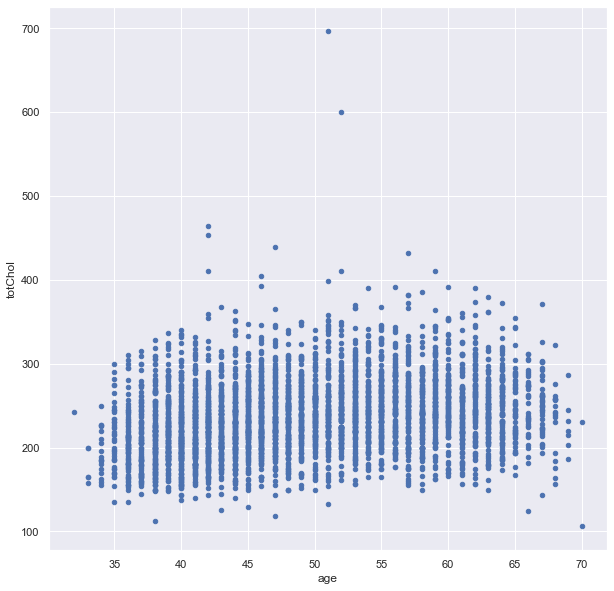

In [254]:
df.plot.scatter('age', 'totChol',figsize=(10, 10))

<AxesSubplot:>

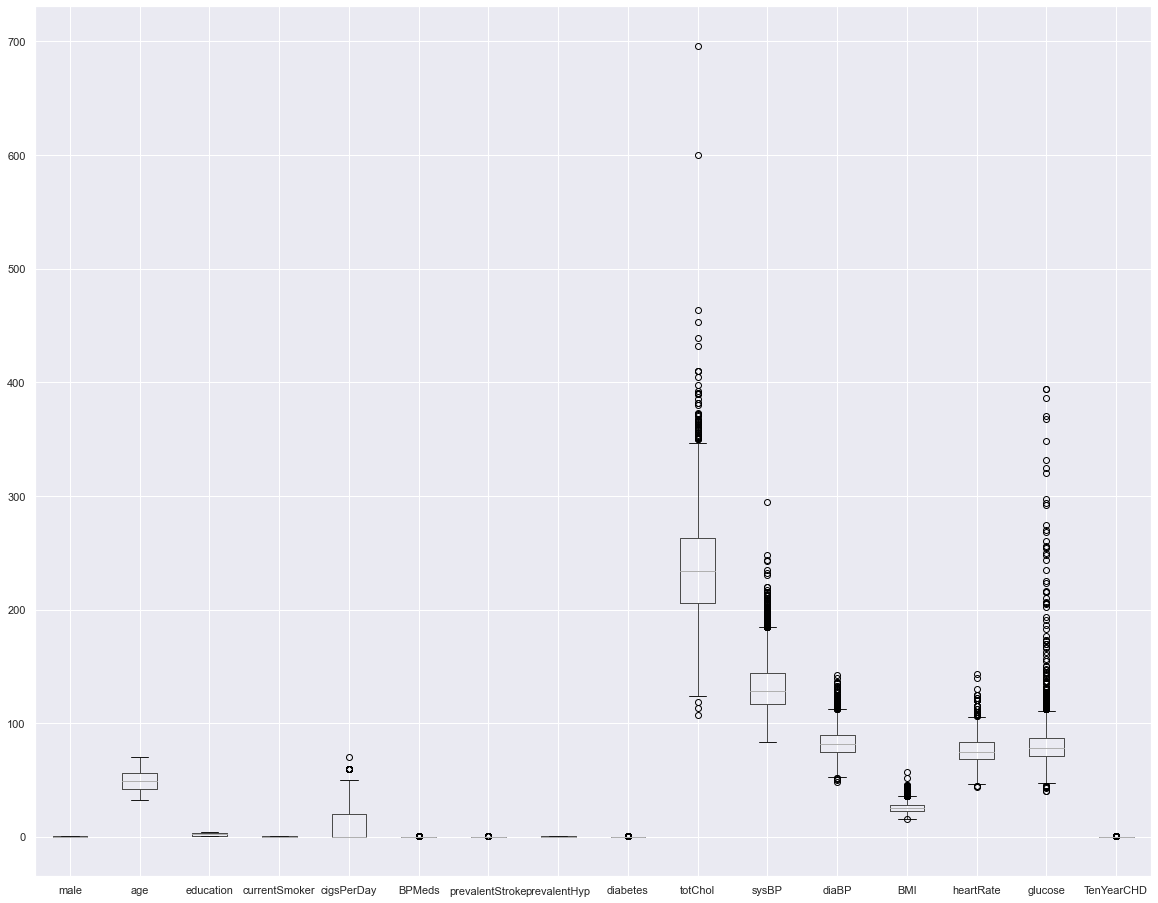

In [255]:
df.boxplot(figsize=(20, 16))

(0.0, 70.0)

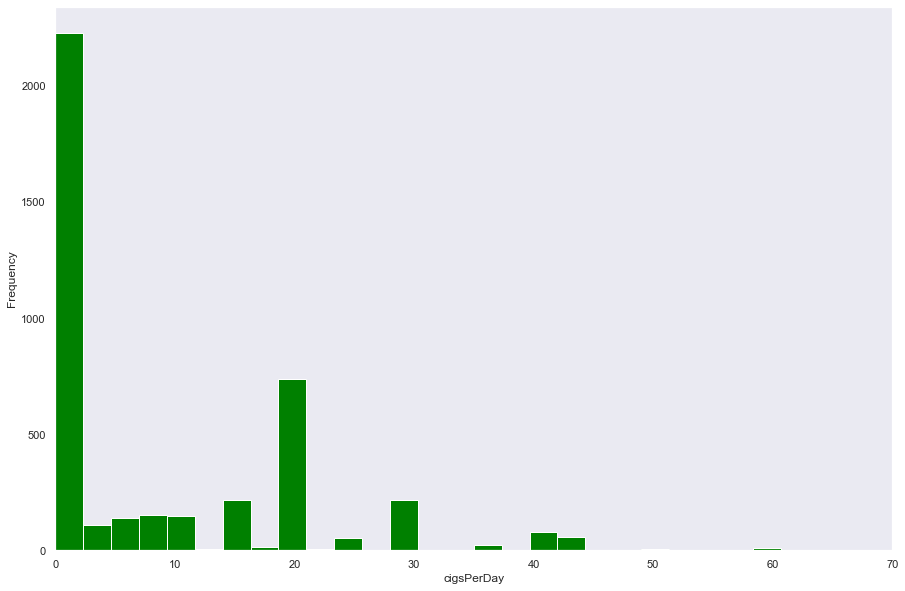

In [256]:
ax = df['cigsPerDay'].hist(bins=30, grid=False, color='green', figsize=(15, 10)) 
ax.set_xlabel('cigsPerDay')
ax.set_ylabel('Frequency')

ax.set_xlim(0, 70)
#ax.set_ylim(0, 120)

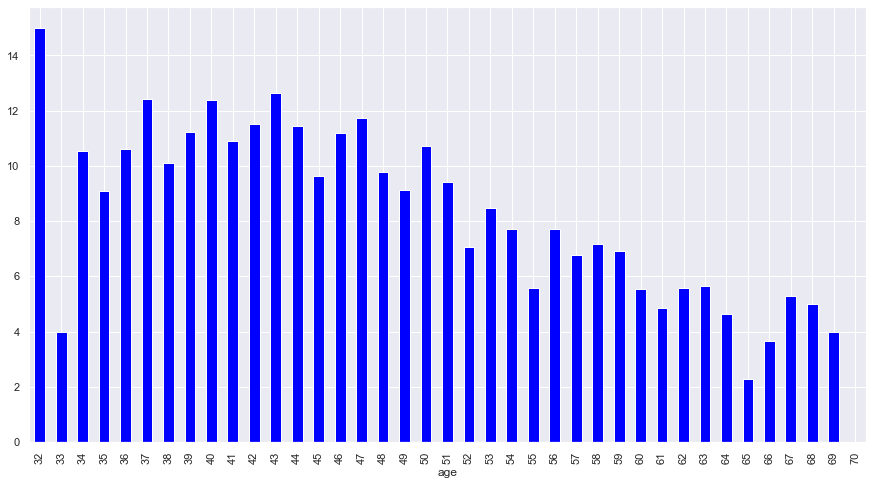

In [257]:
df_avg_Cig = df.groupby('age')['cigsPerDay'].mean()
df_avg_Cig.plot.bar(color='blue');

## CHD Stats

In [258]:
Heart_Attack = data[data.TenYearCHD == 1]
Heart_Attack.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
15,0,38,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
17,0,46,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
25,1,47,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1


In [259]:
Heart_Attack = data[data.TenYearCHD == 1]
Heart_Attack.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
6,0,63,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
15,0,38,20.0,0.0,0,1,0,221.0,140.0,90.0,21.35,95.0,70.0,1
17,0,46,20.0,0.0,0,0,0,291.0,112.0,78.0,23.38,80.0,89.0,1
25,1,47,20.0,0.0,0,0,0,294.0,102.0,68.0,24.18,62.0,66.0,1


In [260]:
No_Heart_Attack = data[data.TenYearCHD == 0]
No_Heart_Attack.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0


In [261]:
data.groupby('TenYearCHD').mean()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,
0,0.425312,48.740313,8.723750,0.024063,0.004063,0.276250,0.020625,235.347187,130.308437,82.182969,25.662769,75.609688,80.665000
1,0.557491,54.233449,10.574913,0.064460,0.013937,0.506969,0.062718,246.311847,143.827526,87.161150,26.644094,76.378049,88.827526


In [262]:
final = data.drop(['diaBP','BMI','heartRate'], axis = 'columns')

In [263]:
No_Heart_Attack = final[final.TenYearCHD == 0]
No_Heart_Attack.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,70.0,0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,85.0,0
5,0,43,0.0,0.0,0,1,0,228.0,180.0,99.0,0


In [264]:
Heart_Attack = final[final.TenYearCHD == 1]
Heart_Attack.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose,TenYearCHD
3,0,61,30.0,0.0,0,1,0,225.0,150.0,103.0,1
6,0,63,0.0,0.0,0,0,0,205.0,138.0,85.0,1
15,0,38,20.0,0.0,0,1,0,221.0,140.0,70.0,1
17,0,46,20.0,0.0,0,0,0,291.0,112.0,89.0,1
25,1,47,20.0,0.0,0,0,0,294.0,102.0,66.0,1


In [265]:
final.groupby('TenYearCHD').mean()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose
TenYearCHD,,,,,,,,,,
0,0.425312,48.740313,8.723750,0.024063,0.004063,0.276250,0.020625,235.347187,130.308437,80.665000
1,0.557491,54.233449,10.574913,0.064460,0.013937,0.506969,0.062718,246.311847,143.827526,88.827526


In [266]:
X = final[['male','age','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','glucose']]
y = final['TenYearCHD']

In [267]:
X

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,glucose
0,1,39,0.0,0.0,0,0,0,195.0,106.0,77.0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,76.0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,70.0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,103.0
4,0,46,23.0,0.0,0,0,0,285.0,130.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0.0,0.0,0,1,0,187.0,141.0,81.0
4232,1,68,0.0,0.0,0,1,0,176.0,168.0,79.0
4233,1,50,1.0,0.0,0,1,0,313.0,179.0,86.0
4234,1,51,43.0,0.0,0,0,0,207.0,126.5,68.0


In [268]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4231    0
4232    1
4233    1
4234    0
4237    0
Name: TenYearCHD, Length: 3774, dtype: int64

##  Model Training

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 99)

In [270]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 1000, C = 1)

In [271]:
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test,y_test))

Accuracy: 0.8649006622516556


### Confusion Matrix

In [272]:
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[645,   7],
       [ 95,   8]], dtype=int64)

In [273]:
print(len(y_test),len(y_pred))
print(X_test.size)

755 755
7550


<AxesSubplot:>

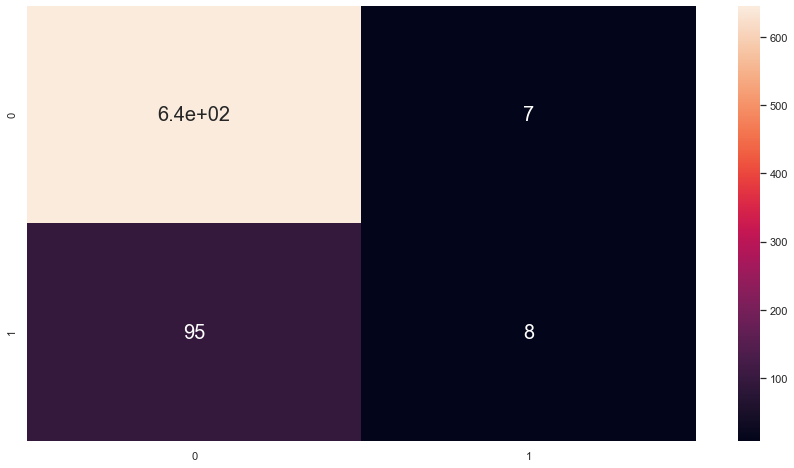

In [274]:
sns.heatmap(matrix, annot = True, annot_kws={'size':20 })

### Precision Recall

In [275]:
from sklearn.metrics import recall_score, precision_score

print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))

Recall:  0.07766990291262135
Precision:  0.5333333333333333


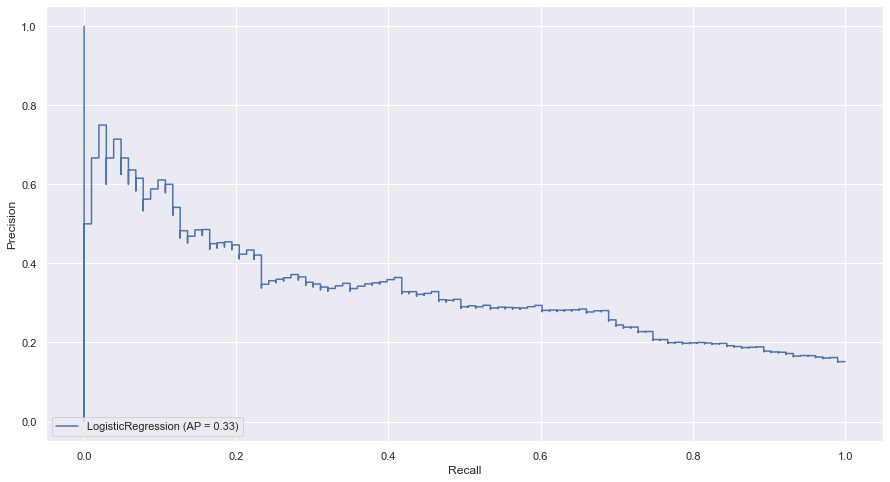

In [276]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(model, X_test, y_test)

### ROC Curve

In [277]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_lr, tpr_lr)

roc_auc_lr

0.5334668532968014

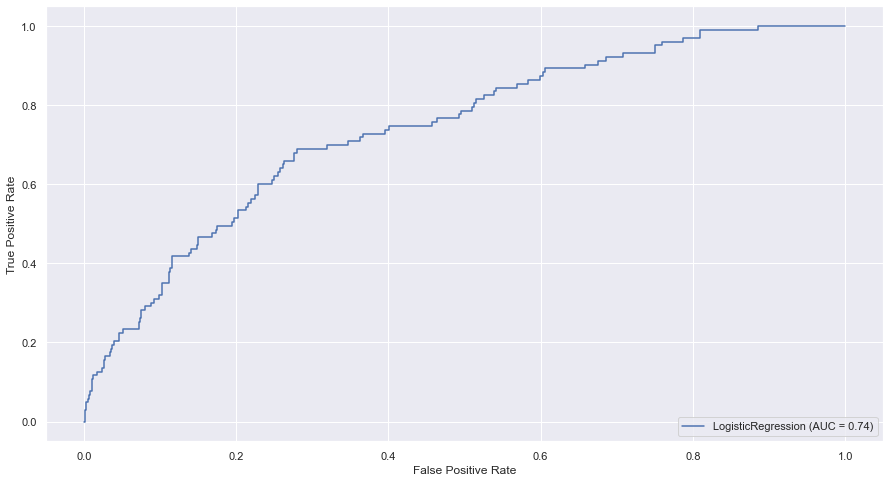

In [278]:
plot_roc_curve(model, X_test, y_test)

# Using k-Fold Cross Validation

In [279]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

In [280]:
k = 10
kf = KFold(n_splits=k, random_state=None)
#model = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
 
print('accuracy of each fold - {}'.format(acc_score))
print('Avg accuracy : {}'.format(avg_acc_score))

accuracy of each fold - [0.8121693121693122, 0.8571428571428571, 0.8624338624338624, 0.8835978835978836, 0.843501326259947, 0.8567639257294429, 0.8647214854111406, 0.8673740053050398, 0.8514588859416445, 0.8355437665782494]
Avg accuracy : 0.853470731056938
